# Classification benchmarks using Neural network

#### Loading necessary packages
- Remember to run setup.sh

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2

2024-03-19 15:20:16.814267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# loading CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# defining what the labels correspond to - found on the CIFAR-10 documentation
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# converting the numeric labels in the actual ones
y_train = np.array(cifar10_labels)[y_train]
y_test = np.array(cifar10_labels)[y_test]

['horse']


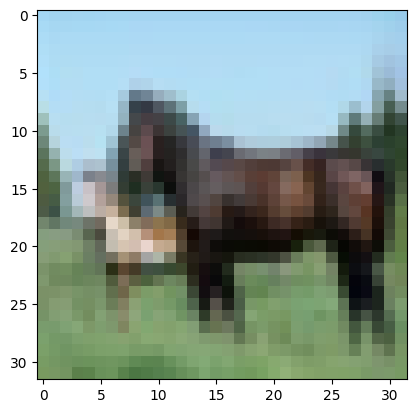

In [3]:
# just doing a sanity check making sure that the labels matches the images
plt.imshow(X_train[12])
print(y_train[12])

#### Preprocessing the images

['horse']


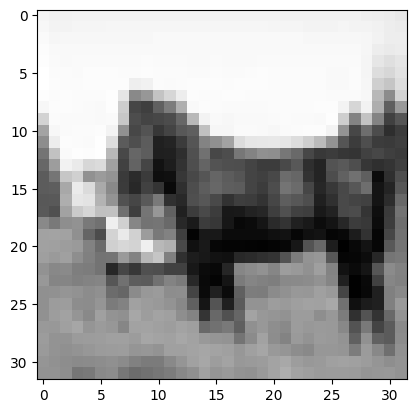

In [4]:
# converting both the training and the test images to grayscale
X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

# normalizing the images
X_train_normalized = X_train_gray / 255.0
X_test_normalized = X_test_gray / 255.0

# sanity test to make sure everything is working as intended
plt.imshow(X_train_normalized[12], cmap=plt.cm.gray)
print(y_train[12])

# flattening the images in accordance with the README for the assignment
X_train_processed = X_train_normalized.reshape(-1, 1024)
X_test_processed = X_test_normalized.reshape(-1, 1024)

#### Parameter GridSearch

#### Parameter GridSearch
- In order to experiment with optimal parameters for the model, we will employ the GridSearch module of SkLearn
- First, we define a parameter grid. We will try to change the hidden layer size, alpha-value and tolerance
- We will keep activation constant as relu, solver as adam (as it works well for large datasets), learning_rate as constant and not change the maximum iterations either.
- We will also keep the hidden layer size constant at (100,)

- The GridSearch didnt converge within multiple hours, so ended up going with the default parameters of the MLPClassifier.

In [6]:
"""# Specifying the parameters to try out
parameter_grid = {
    'alpha': [0.001, 0.01],
    'tol': [0.001, 0.01]
}

# intizilize the grid search object
grid_search_nn = GridSearchCV(MLPClassifier(), parameter_grid)

# Perform grid search
grid_search_nn.fit(X_train_processed, y_train)

# finding the best parameters
print("Best parameters:", grid_search_nn.best_params_)"""

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training inte

### Neural Network Classifier

In [5]:
# initialize the MLPClassifier with the best parameters found in the gridsearch
nn_model = MLPClassifier()

# training the NN model
nn_model.fit(X_train_processed, y_train)

# predicting on the test set
y_pred = nn_model.predict(X_test_processed)

# generating the report
report = classification_report(y_test, y_pred)

print(report)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

    airplane       0.45      0.45      0.45      1000
  automobile       0.40      0.62      0.49      1000
        bird       0.32      0.23      0.27      1000
         cat       0.26      0.26      0.26      1000
        deer       0.31      0.35      0.33      1000
         dog       0.37      0.33      0.35      1000
        frog       0.41      0.43      0.42      1000
       horse       0.55      0.37      0.44      1000
        ship       0.48      0.52      0.50      1000
       truck       0.47      0.44      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



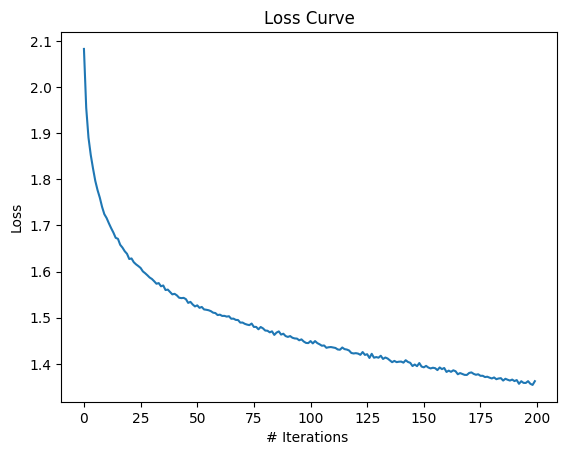

In [10]:
# Plotting the loss curve loss curve
plt.plot(best_nn_model.loss_curve_)
plt.xlabel("# Iterations ")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig("../out/loss_curve_nn.png")
plt.show()

In [9]:
# Print and save the classification report
print(report)

with open("../out/classification_report_nn.txt", "w") as f:
    f.write(report)

              precision    recall  f1-score   support

    airplane       0.45      0.45      0.45      1000
  automobile       0.40      0.62      0.49      1000
        bird       0.32      0.23      0.27      1000
         cat       0.26      0.26      0.26      1000
        deer       0.31      0.35      0.33      1000
         dog       0.37      0.33      0.35      1000
        frog       0.41      0.43      0.42      1000
       horse       0.55      0.37      0.44      1000
        ship       0.48      0.52      0.50      1000
       truck       0.47      0.44      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000

